# Fashion MNIST 연습 : DNN

## 1.라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
labels = ['T-shirt',
          'Trouser',
          'Pullover',
          'Dress',
          'Coat',
          'Sandal',
          'Shirt',
          'Sneaker',
          'Bag',
          'Ankle boot'
          ]

print(labels)

['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
import numpy as np
import matplotlib.pyplot as plt

idx = 8042
다음 이미지는 Dress


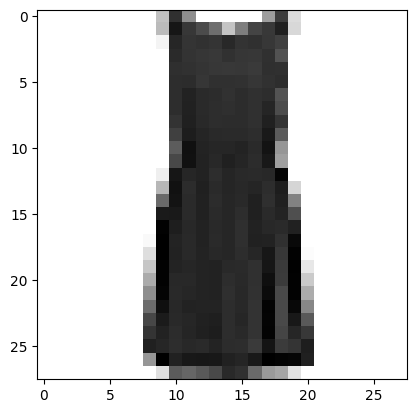

In [7]:
idx = np.random.randint(0, 60000)

print(f'idx = {idx}')
print(f'다음 이미지는 {labels[train_y[idx]]}')

plt.imshow(train_x[idx], cmap='Greys')
plt.show()

## 2.preprocessing

* X : Min-Max Scaling

In [8]:
## MinMaxScaler 금지!

In [9]:
max_n, min_n = train_x.max(), train_x.min()
max_n, min_n

(255, 0)

In [10]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [11]:
train_x.max(), train_x.min()

(1.0, 0.0)

* X : Data Reshape (흑백 채널 추가)

In [12]:
train_x.shape

(60000, 28, 28)

In [13]:
train_x_re = train_x.reshape(train_x.shape[0], 28, 28, -1)
test_x_re = test_x.reshape(test_x.shape[0], 28, 28, -1)

In [14]:
train_x_re.shape

(60000, 28, 28, 1)

In [15]:
# np.expand_dims(train_x, axis=3)

* Y : One-hot Encoding

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
train_y.shape

(60000,)

In [18]:
class_n = len(np.unique(train_y))

In [19]:
train_y_hot = to_categorical(train_y, class_n)
test_y_hot = to_categorical(test_y, class_n)

In [20]:
train_y_hot.shape

(60000, 10)

In [21]:
train_x_re.shape, train_y_hot.shape

((60000, 28, 28, 1), (60000, 10))

## 3.Modeling
1. Sequential API : 레이어를 순차적으로 차곡차곡!
2. Functional API : 레이어를 사슬처럼 엮기!

In [22]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout

In [23]:
## Sequential API
# 1. 세션 클리어 : 메모리에 기존의 모델 구조가 남아있다면 지워줘!
clear_session()

# 2. 모델 발판 선언 : 레이어 블록을 차곡차곡 쌓을 발판!
model1 = Sequential()

# 3. 레이어 조립 : 순차적으로 쌓음!
model1.add( Input(shape=(28,28,1)) )
model1.add( Flatten() )
model1.add( Dense(1024, activation='relu') )
model1.add( Dense(1024, activation='relu') )
model1.add( BatchNormalization() )
model1.add( Dropout(0.25) )
model1.add( Dense(512, activation='relu') )
model1.add( Dense(512, activation='relu') )
model1.add( BatchNormalization() )
model1.add( Dropout(0.25) )
model1.add( Dense(256, activation='relu') )
model1.add( Dense(128, activation='relu') )
model1.add( BatchNormalization() )
model1.add( Dropout(0.25) )
model1.add( Dense(10, activation='softmax') )

# 4. 컴파일
model1.compile(optimizer='adam',
               loss=keras.losses.categorical_crossentropy,
               metrics=['accuracy']
               )

In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                        

In [25]:
## Functional API
# 1. 세션 클리어 : 청소
clear_session()

# 2. 레이어를 사슬처럼 엮기
il = Input(shape=(28,28,1))
hl = Flatten()(il)

hl = Dense(1024, activation='relu')(hl)
hl = Dense(1024, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)

hl = Dense(512, activation='relu')(hl)
hl = Dense(512, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)

hl = Dense(256, activation='relu')(hl)
hl = Dense(128, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)

ol = Dense(10, activation='softmax')(hl)

# 3. 모델의 시작과 끝 지정/알려줌
model2 = Model(il, ol)

# 4. 컴파일
model2.compile(optimizer='adam',
               loss=keras.losses.categorical_crossentropy,
               metrics=['accuracy']
               )

In [26]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                             

### Early Stopping
- 과적합 방지!

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
es = EarlyStopping(monitor='val_loss',        # 얼리스토핑을 적용할 관측 대상!
                   min_delta=0,               # 설정한 값 이상으로 변화해야 성능 개선으로 간주! Threshold!
                   patience=3,                # 성능 개선이 발생하지 않을 때, 몇 에포크 더 지켜볼 것인지!
                   verbose=1,
                   restore_best_weights=True  # 얼리스토핑 적용 후, 최적의 가중치를 모델에 전달!
                   )

In [29]:
model1.fit(train_x_re, train_y_hot, epochs=10000, verbose=1,
           validation_split=0.2,  # 매 epoch마다 랜덤하게 20%를 validation set화 함!
           callbacks=[es]         # 얼리스토핑을 수행하기 위한!
           )

Epoch 1/10000
1500/1500 [==============================] - 18s 6ms/step - loss: 0.6154 - accuracy: 0.7851 - val_loss: 0.4515 - val_accuracy: 0.8411
Epoch 2/10000
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4572 - accuracy: 0.8391 - val_loss: 0.4001 - val_accuracy: 0.8579
Epoch 3/10000
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4071 - accuracy: 0.8533 - val_loss: 0.4077 - val_accuracy: 0.8608
Epoch 4/10000
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3741 - accuracy: 0.8663 - val_loss: 0.3727 - val_accuracy: 0.8623
Epoch 5/10000
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3504 - accuracy: 0.8731 - val_loss: 0.3894 - val_accuracy: 0.8633
Epoch 6/10000
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3348 - accuracy: 0.8796 - val_loss: 0.3518 - val_accuracy: 0.8801
Epoch 7/10000
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3171 - accuracy: 0.8851 - val_loss: 

* 모델 성능 평가

In [56]:
model1.evaluate(test_x_re, test_y_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.3533 - accuracy: 0.8698


[0.35334810614585876, 0.8697999715805054]

* 예측값 생성

In [57]:
y_pred = model1.predict(test_x_re)

313/313 [==============================] - 1s 2ms/step


In [58]:
y_pred

array([[9.4809511e-06, 8.8048737e-06, 8.0290629e-06, ..., 2.8839773e-03,
        5.8179953e-06, 9.9661839e-01],
       [3.5026006e-04, 5.1599517e-07, 9.6235543e-01, ..., 1.8944108e-06,
        7.8653347e-06, 1.1505227e-06],
       [1.1024580e-06, 9.9998915e-01, 1.7111474e-06, ..., 3.0977384e-07,
        1.2295349e-06, 1.2656298e-07],
       ...,
       [1.5850060e-03, 2.6797961e-06, 1.4185406e-04, ..., 2.2506862e-05,
        9.9727172e-01, 3.9122397e-06],
       [3.2278253e-06, 9.9987662e-01, 3.0650394e-06, ..., 2.9644505e-07,
        1.0506158e-05, 6.6061748e-06],
       [4.4416233e-06, 1.6793224e-06, 6.1789865e-06, ..., 1.8420644e-02,
        1.8467043e-05, 8.0895763e-05]], dtype=float32)

In [59]:
y_pred.shape

(10000, 10)

In [60]:
y_pred[0]

array([9.4809511e-06, 8.8048737e-06, 8.0290629e-06, 1.2099741e-05,
       4.9804830e-06, 4.3006203e-04, 1.8331393e-05, 2.8839773e-03,
       5.8179953e-06, 9.9661839e-01], dtype=float32)

In [61]:
y_pred_arg = np.argmax(y_pred, axis=1)

In [62]:
y_pred_arg.shape

(10000,)

In [63]:
y_pred_arg[0]

9

* 성능 지표

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(test_y, y_pred_arg, target_names=labels))

              precision    recall  f1-score   support

     T-shirt       0.81      0.86      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.65      0.73      1000
       Dress       0.89      0.87      0.88      1000
        Coat       0.72      0.88      0.79      1000
      Sandal       0.99      0.93      0.96      1000
       Shirt       0.66      0.65      0.65      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## Visualization

idx = 5587
실제 그림 = Pullover
모델 예측 = Coat
모델의 클래스별 확률
{'T-shirt': 0.0, 'Trouser': 0.0, 'Pullover': 0.0, 'Dress': 0.0, 'Coat': 0.0, 'Sandal': 0.0, 'Shirt': 0.0, 'Sneaker': 0.0, 'Bag': 0.0, 'Ankle boot': 99.0}
땡!!!


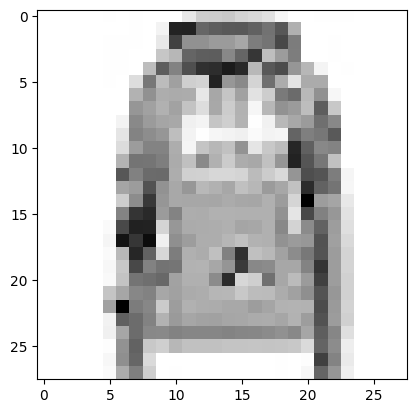

In [74]:
id = np.random.randint(0, 10000)

print(f'idx = {id}')
print(f'실제 그림 = {labels[test_y[id]]}')
print(f'모델 예측 = {labels[y_pred_arg[id]]}')

prob = np.floor(y_pred[0]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print(f'모델의 클래스별 확률')
print(prob_dict)

if y_pred_arg[id] == test_y[id] :
    print('정답!')
else :
    print('땡!!!')

plt.imshow(test_x_re[id].reshape([28, 28]), cmap='Greys')
plt.show()

* 틀린 것만 살펴봅시다.
    - 틀릴만한 이미지가 맞는지?!

idx = 8997
실제 그림 = Shirt
모델 예측 = T-shirt
모델의 클래스별 확률
{'T-shirt': 0.0, 'Trouser': 0.0, 'Pullover': 0.0, 'Dress': 0.0, 'Coat': 0.0, 'Sandal': 0.0, 'Shirt': 0.0, 'Sneaker': 0.0, 'Bag': 0.0, 'Ankle boot': 99.0}
땡!!!


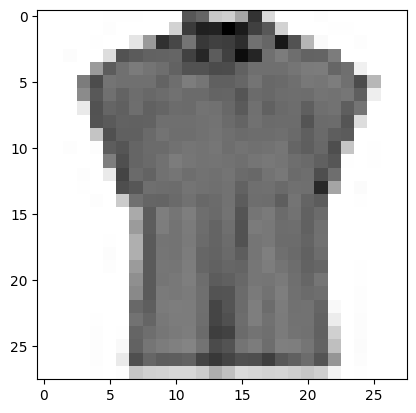

In [80]:
true_false = (test_y==y_pred_arg)
f_id = np.where(true_false==False)[0]
f_n = len(f_id)

id = f_id[np.random.randint(0, f_n)]

print(f'idx = {id}')
print(f'실제 그림 = {labels[test_y[id]]}')
print(f'모델 예측 = {labels[y_pred_arg[id]]}')

prob = np.floor(y_pred[0]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print(f'모델의 클래스별 확률')
print(prob_dict)

if y_pred_arg[id] == test_y[id] :
    print('정답!')
else :
    print('땡!!!')

plt.imshow(test_x_re[id].reshape([28, 28]), cmap='Greys')
plt.show()